In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_orig = pd.read_csv("/content/train.csv")
test_orig = pd.read_csv("/content/test.csv")

In [ ]:
train_orig.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
test_orig.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [ ]:
train = train_orig.copy()
test = test_orig.copy()

In [ ]:
train.color_type.value_counts()

Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Brown Merle            39
Orange                 39
Black Smoke            32
Gold                   31
Tortie Point           26
Silver                 24
Red Tick               23
Blue Tick              21
Blue Point             20
Lilac Point 

In [ ]:
color_map = {'Brown Tabby':'Brown','Brown Brindle':'Brown','Brown Merle':'Brown','Brown Tiger':'Brown','Brown':'Brown',
             'Chocolate':'Chocolate','Chocolate Point':'Chocoalte','Liver':'Liver','Liver Tick':'Liver',
             'Torbie':'Black-Brown','Sable':'Black-Brown','Buff':'Black-Brown','Seal Point':'Black-Brown',
             'Tortie Point':'Tortie','Tortie':'Tortie','Agouti':'Black-Brown',
             'Black Brindle':'Black','Black Tiger':'Black','Black Tabby':'Black','Black Smoke':'Black','Black':'Black',

             'Red':'Reddish-Orange','Red Tick':'Reddish-Orange','Red Merle':'Reddish-Orange','Apricot':'Reddish-Orange','Orange':'Reddish-Orange',
             'Yellow':'Yellowish-Orange','Tan':'Yellowish-Orange','Gold':'Yellowish-Orange','Yellow Brindle':'Yellowish-Orange','Orange Tabby':'Reddish-Orange',

             'Gray':'Gray','Gray Tabby':'Gray','Calico':'Gray','Calico Point':'Gray',
             'Silver':'Silver','Silver Tabby':'Silver','Silver Lynx Point':'Silver',

             'Cream':'Cream','Cream Tabby':'Cream','Fawn':'Cream','Lynx Point':'Cream','White':'Cream','Flame Point':'Cream','Lilac Point':'Cream',
             
             'Tricolor':'Other','Pink':'Other','Green':'Other',

             'Blue Tabby':'Blue','Blue Merle':'Blue','Blue Tick':'Blue','Blue Point':'Blue','Blue Tiger':'Blue','Blue Cream':'Blue','Blue Smoke':'Blue','Blue':'Blue',
             }

train.color_type = train.color_type.map(color_map, na_action = 'ignore')

In [ ]:
train.color_type.value_counts()

Black               4774
Brown               4017
Cream               3153
Yellowish-Orange    1538
Blue                1409
Reddish-Orange      1405
Gray                 727
Black-Brown          616
Other                485
Tortie               392
Chocolate            259
Silver                46
Chocoalte              9
Liver                  4
Name: color_type, dtype: int64

In [ ]:
color_map = {'Brown Tabby':'Brown','Brown Brindle':'Brown','Brown Merle':'Brown','Brown Tiger':'Brown','Brown':'Brown',
             'Chocolate':'Chocolate','Chocolate Point':'Chocoalte','Liver':'Liver','Liver Tick':'Liver',
             'Torbie':'Black-Brown','Sable':'Black-Brown','Buff':'Black-Brown','Seal Point':'Black-Brown',
             'Tortie Point':'Tortie','Tortie':'Tortie','Agouti':'Black-Brown',
             'Black Brindle':'Black','Black Tiger':'Black','Black Tabby':'Black','Black Smoke':'Black','Black':'Black',

             'Red':'Reddish-Orange','Red Tick':'Reddish-Orange','Red Merle':'Reddish-Orange','Apricot':'Reddish-Orange','Orange':'Reddish-Orange',
             'Yellow':'Yellowish-Orange','Tan':'Yellowish-Orange','Gold':'Yellowish-Orange','Yellow Brindle':'Yellowish-Orange','Orange Tabby':'Reddish-Orange',

             'Gray':'Gray','Gray Tabby':'Gray','Calico':'Gray','Calico Point':'Gray',
             'Silver':'Silver','Silver Tabby':'Silver','Silver Lynx Point':'Silver',

             'Cream':'Cream','Cream Tabby':'Cream','Fawn':'Cream','Lynx Point':'Cream','White':'Cream','Flame Point':'Cream','Lilac Point':'Cream',
             
             'Tricolor':'Other','Pink':'Other','Green':'Other',

             'Blue Tabby':'Blue','Blue Merle':'Blue','Blue Tick':'Blue','Blue Point':'Blue','Blue Tiger':'Blue','Blue Cream':'Blue','Blue Smoke':'Blue','Blue':'Blue',
             }

test.color_type = test.color_type.map(color_map, na_action = 'ignore')

In [ ]:
test.color_type.value_counts()

Black               2022
Brown               1757
Cream               1317
Yellowish-Orange     667
Blue                 619
Reddish-Orange       591
Gray                 317
Black-Brown          261
Other                203
Tortie               154
Chocolate            133
Silver                21
Chocoalte              8
Liver                  2
Name: color_type, dtype: int64

In [ ]:
train['issue_year'] = 0
train['listing_year'] = 0

for idx, date in enumerate(train.issue_date):
  train.loc[idx,'issue_year'] = int(date[:4])

for idx, date in enumerate(train.listing_date):
  train.loc[idx,'listing_year'] = int(date[:4])

train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,listing_year
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,2016
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,2013,2018
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,2016
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,2016,2019
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,2017,2017


In [ ]:
test['issue_year'] = 0
test['listing_year'] = 0

for idx, date in enumerate(test.issue_date):
  test.loc[idx,'issue_year'] = int(date[:4])

for idx, date in enumerate(test.listing_date):
  test.loc[idx,'listing_year'] = int(date[:4])

test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,issue_year,listing_year
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7,2005,2017
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1,2018,2019
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7,2012,2018
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1,2015,2018
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7,2017,2018


In [ ]:
train['issue_month'] = 0
train['listing_month'] = 0

for idx, date in enumerate(train.issue_date):
  train.loc[idx,'issue_month'] = int(date[5:7])

for idx, date in enumerate(train.listing_date):
  train.loc[idx,'listing_month'] = int(date[5:7])

train.drop(['issue_date','listing_date'],axis=1,inplace=True)

train.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,issue_year,listing_year,issue_month,listing_month
0,ANSL_69903,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,2016,2016,7,9
1,ANSL_66892,1.0,White,0.72,14.19,13,9,0.0,2,2013,2018,11,12
2,ANSL_69750,NaN,Brown,0.15,40.90,15,4,2.0,4,2014,2016,9,10
3,ANSL_71623,1.0,White,0.62,17.82,0,1,0.0,2,2016,2019,12,1
4,ANSL_57969,2.0,Black,0.50,11.06,18,4,0.0,1,2017,2017,9,11


In [ ]:
test['issue_month'] = 0
test['listing_month'] = 0

for idx, date in enumerate(test.issue_date):
  test.loc[idx,'issue_month'] = int(date[5:7])

for idx, date in enumerate(test.listing_date):
  test.loc[idx,'listing_month'] = int(date[5:7])

test.drop(['issue_date','listing_date'],axis=1,inplace=True)

test.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,issue_year,listing_year,issue_month,listing_month
0,ANSL_75005,0.0,Black,0.87,42.73,0,7,2005,2017,8,9
1,ANSL_76663,1.0,Orange Tabby,0.06,6.71,0,1,2018,2019,11,5
2,ANSL_58259,1.0,Black,0.24,41.21,0,7,2012,2018,10,4
3,ANSL_67171,1.0,Black,0.29,8.46,7,1,2015,2018,2,4
4,ANSL_72871,1.0,Brown,0.71,30.92,0,7,2017,2018,1,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   condition       17357 non-null  float64
 2   color_type      18834 non-null  object 
 3   length(m)       18834 non-null  float64
 4   height(cm)      18834 non-null  float64
 5   X1              18834 non-null  int64  
 6   X2              18834 non-null  int64  
 7   breed_category  18834 non-null  float64
 8   pet_category    18834 non-null  int64  
 9   issue_year      18834 non-null  int64  
 10  listing_year    18834 non-null  int64  
 11  issue_month     18834 non-null  int64  
 12  listing_month   18834 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 1.9+ MB


In [ ]:
train.set_index('pet_id',inplace=True)
test.set_index('pet_id',inplace=True)

[Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

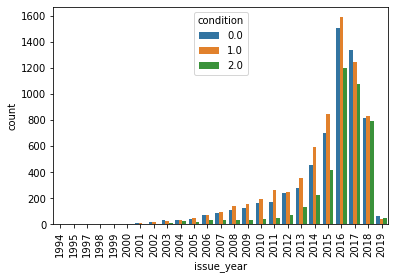

In [ ]:
chart = sns.countplot(x='issue_year', hue='condition', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

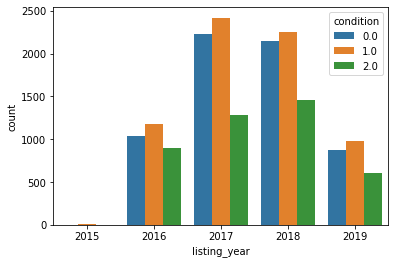

In [ ]:
sns.countplot(x='listing_year', hue='condition', data=train)

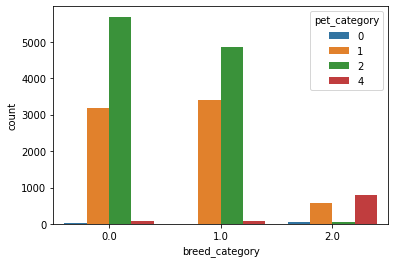

In [ ]:
sns.countplot(x='breed_category', hue='pet_category', data=train)

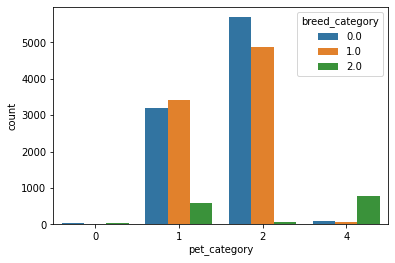

In [ ]:
sns.countplot(x='pet_category', hue='breed_category', data=train)

In [ ]:
train[train.condition.isna()][['condition','issue_year','listing_year']]

,condition,issue_year,listing_year
pet_id,,,
ANSL_69750,NaN,2014,2016
ANSL_50488,NaN,2018,2018
ANSL_54000,NaN,2018,2018
ANSL_50330,NaN,2017,2018
ANSL_58673,NaN,2017,2018
...,...,...,...
ANSL_62681,NaN,2017,2017
ANSL_69550,NaN,2016,2016
ANSL_65823,NaN,2009,2018


In [ ]:
train.condition.fillna(0,inplace=True)
test.condition.fillna(0,inplace=True)

In [ ]:
train["diff_issue_list"] = train["listing_year"] - train["issue_year"]
test["diff_issue_list"] = test["listing_year"] - test["issue_year"]

train["duration_at_shelter"] = 2020 - train["listing_year"]
test["duration_at_shelter"] = 2020 - test["listing_year"]

train["issue_year"] = train["issue_year"]/2020.
test["issue_year"] = test["issue_year"]/2020.

train.drop(["issue_year","listing_year"],axis=1,inplace=True)
test.drop(["issue_year","listing_year"],axis=1,inplace=True)

In [ ]:
train["area(m2)"] = train["length(m)"] * train["height(cm)"]/100
test["area(m2)"] = test["length(m)"] * test["height(cm)"]/100

In [ ]:
train["age"] = train.X1
test["age"] = test.X1

train.drop("X1",axis=1,inplace=True)
test.drop("X1",axis=1,inplace=True)

In [ ]:
train.drop(["issue_month","listing_month"],axis=1,inplace=True)
test.drop(["issue_month","listing_month"],axis=1,inplace=True)

In [ ]:
Y1 = train['breed_category']
Y2 = train['pet_category']
train.drop(['breed_category','pet_category'],axis=1,inplace=True)

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train['color_type']= label_encoder.fit_transform(train['color_type']) 
  
train['color_type'].unique()

array([18, 53, 15,  2, 40, 52, 21, 16,  7, 50, 30, 27, 20, 49, 38, 43, 48,
       13, 37, 12, 23,  5,  3, 26, 29, 22,  9, 41, 54, 36,  8, 28, 25, 55,
       14, 44, 42, 17,  4, 31, 32, 51, 11,  1, 10, 47, 33, 45, 19, 34,  0,
       24, 35, 39,  6, 46])

In [ ]:
column_maxes = train.max()
df_max = column_maxes.max()
train = train / df_max

In [ ]:
train

,condition,color_type,length(m),height(cm),X2,diff_issue_list,duration_at_shelter,area(m2),age
pet_id,,,,,,,,,
ANSL_69903,0.036364,0.327273,0.014545,0.141455,0.163636,0.000000,0.072727,0.001132,0.236364
ANSL_66892,0.018182,0.963636,0.013091,0.258000,0.163636,0.090909,0.036364,0.001858,0.236364
ANSL_69750,0.000000,0.272727,0.002727,0.743636,0.072727,0.036364,0.072727,0.001115,0.272727
ANSL_71623,0.018182,0.963636,0.011273,0.324000,0.018182,0.054545,0.018182,0.002009,0.000000
ANSL_57969,0.036364,0.036364,0.009091,0.201091,0.072727,0.000000,0.054545,0.001005,0.327273
...,...,...,...,...,...,...,...,...,...
ANSL_51738,0.036364,0.945455,0.008000,0.497455,0.018182,0.018182,0.036364,0.002189,0.000000
ANSL_59900,0.000000,0.272727,0.013273,0.259091,0.072727,0.018182,0.054545,0.001891,0.272727
ANSL_53210,0.000000,0.400000,0.018000,0.511455,0.163636,0.145455,0.036364,0.005063,0.236364


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
test['color_type']= label_encoder.fit_transform(test['color_type']) 
  
test['color_type'].unique()

array([ 2, 36, 14, 17, 51, 25, 38, 11, 46,  1, 50, 15, 28, 21,  6, 52, 29,
        8, 34,  3, 19, 48, 18, 31, 23, 41, 43, 24, 20, 39, 12, 26, 47, 16,
       45,  5, 49, 10, 42,  7, 53, 22, 35,  4, 40, 44,  9,  0, 27, 30, 13,
       37, 32, 33])

In [ ]:
column_maxes = test.max()
df_max = column_maxes.max()
test = test / df_max

In [ ]:
test

,condition,color_type,length(m),height(cm),X2,diff_issue_list,duration_at_shelter,area(m2),age
pet_id,,,,,,,,,
ANSL_75005,0.000000,0.037736,0.016415,0.806226,0.132075,0.226415,0.056604,0.007014,0.000000
ANSL_76663,0.018868,0.679245,0.001132,0.126604,0.018868,0.018868,0.018868,0.000076,0.000000
ANSL_58259,0.018868,0.037736,0.004528,0.777547,0.132075,0.113208,0.037736,0.001866,0.000000
ANSL_67171,0.018868,0.037736,0.005472,0.159623,0.018868,0.056604,0.037736,0.000463,0.132075
ANSL_72871,0.018868,0.264151,0.013396,0.583396,0.132075,0.018868,0.037736,0.004142,0.000000
...,...,...,...,...,...,...,...,...,...
ANSL_66809,0.037736,0.264151,0.015472,0.680755,0.169811,0.018868,0.056604,0.005582,0.245283
ANSL_59041,0.000000,0.867925,0.009245,0.519623,0.169811,0.056604,0.037736,0.002546,0.245283
ANSL_60034,0.000000,0.037736,0.018491,0.701698,0.132075,0.037736,0.056604,0.006877,0.000000


In [ ]:
Y1.value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(train, Y1, train_size=0.9, test_size=0.1, random_state=0)

In [ ]:
"""from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of XGB:" , mae)

model = LGBMClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of LGBM:" , mae)"""

MAE of XGB: 0.12845010615711253
MAE of LGBM: 0.12314225053078556


In [ ]:
#predictions_1 = model.predict(test)

In [ ]:
#predictions_2 = model.predict(test)

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(256, activation ="relu", input_dim = 9))
model_1.add(tf.keras.layers.Dense(128, activation = "relu"))
model_1.add(tf.keras.layers.Dense(64, activation = "relu"))
model_1.add(tf.keras.layers.Dense(32, activation = "relu"))
model_1.add(tf.keras.layers.Dense(16, activation = "relu"))
model_1.add(tf.keras.layers.Dense(8, activation = "relu"))
model_1.add(tf.keras.layers.Dense(3, activation = "softmax"))

In [ ]:
# compile the keras model
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model_1.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.5422 - accuracy: 0.7112 - val_loss: 0.2736 - val_accuracy: 0.8445
Epoch 2/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2742 - accuracy: 0.8475 - val_loss: 0.2517 - val_accuracy: 0.8604
Epoch 3/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2632 - accuracy: 0.8490 - val_loss: 0.2433 - val_accuracy: 0.8646
Epoch 4/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2537 - accuracy: 0.8509 - val_loss: 0.2348 - val_accuracy: 0.8652
Epoch 5/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.8544 - val_loss: 0.2173 - val_accuracy: 0.8710
Epoch 6/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2303 - accuracy: 0.8614 - val_loss: 0.2474 - val_accuracy: 0.8567
Epoch 7/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.2418 - accuracy: 0.8621 - val_loss: 0.2100 - val_accuracy:

In [ ]:
predictions_1 = np.argmax(model_1.predict(test), axis=-1)
np.unique(predictions_1)

array([0, 1, 2])

In [ ]:
Y2.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(train, Y2, train_size=0.9, test_size=0.1, random_state=0)

X_test = test

In [ ]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(256, activation ="relu", input_dim = 9))
model_2.add(tf.keras.layers.Dense(128, activation = "relu"))
model_2.add(tf.keras.layers.Dense(64, activation = "relu"))
model_2.add(tf.keras.layers.Dense(32, activation = "relu"))
model_2.add(tf.keras.layers.Dense(16, activation = "relu"))
model_2.add(tf.keras.layers.Dense(8, activation = "relu"))
model_2.add(tf.keras.layers.Dense(5, activation = "softmax"))

In [ ]:
# compile the keras model
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model_2.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_valid,y_valid))

Epoch 1/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.7694 - accuracy: 0.6382 - val_loss: 0.6513 - val_accuracy: 0.7017
Epoch 2/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6746 - accuracy: 0.7031 - val_loss: 0.6177 - val_accuracy: 0.7341
Epoch 3/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6459 - accuracy: 0.7194 - val_loss: 0.5926 - val_accuracy: 0.7436
Epoch 4/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6275 - accuracy: 0.7286 - val_loss: 0.5812 - val_accuracy: 0.7447
Epoch 5/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6186 - accuracy: 0.7296 - val_loss: 0.5816 - val_accuracy: 0.7447
Epoch 6/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6093 - accuracy: 0.7338 - val_loss: 0.5598 - val_accuracy: 0.7521
Epoch 7/10
1695/1695 [==============================] - 3s 2ms/step - loss: 0.6017 - accuracy: 0.7366 - val_loss: 0.5774 - val_accuracy:

In [ ]:
predictions_2 = np.argmax(model_2.predict(test), axis=-1)
np.unique(predictions_2)

array([0, 1, 2, 4])

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'pet_id': X_test.index,
                       'breed_category': predictions_1,
                       'pet_category': predictions_2})
output.to_csv('submission.csv', index=False)